In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!unzip "/content/data.zip" -d "/content"

Archive:  /content/gdrive/MyDrive/Colab Notebooks/Github/Quality Control Image Classifier/data.zip
replace /content/data/def_front/cast_def_0_0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/data/def_front/cast_def_0_100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/def_front/cast_def_0_100.jpeg  
  inflating: /content/data/def_front/cast_def_0_1015.jpeg  
  inflating: /content/data/def_front/cast_def_0_102.jpeg  
  inflating: /content/data/def_front/cast_def_0_1046.jpeg  
  inflating: /content/data/def_front/cast_def_0_1053.jpeg  
  inflating: /content/data/def_front/cast_def_0_1055.jpeg  
  inflating: /content/data/def_front/cast_def_0_1077.jpeg  
  inflating: /content/data/def_front/cast_def_0_1087.jpeg  
  inflating: /content/data/def_front/cast_def_0_1091.jpeg  
  inflating: /content/data/def_front/cast_def_0_1104.jpeg  
  inflating: /content/data/def_front/cast_def_0_1108.jpeg  
  inflating: /content/data/def_front/cast_def_0_1112.jpeg  

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline
np.random.seed(1)
#Sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#Keras
from keras.models import Sequential, load_model
from tensorflow.keras.applications import ResNet50
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras import regularizers
from random import randint


### Images size 512x512

In [4]:
location = '/content/data'

In [5]:
images_data = []
labels_data = []

In [6]:
for img in os.listdir(f'{location}/def_front'):
  image = cv2.imread(f'{location}/def_front/{img}')
  image = cv2.resize(image, (128, 128))
  images_data.append(image)
  labels_data.append(1)

In [7]:
for img in os.listdir(f'{location}/ok_front'):
  image = cv2.imread(f'{location}/ok_front/{img}')
  image = cv2.resize(image, (128, 128))
  images_data.append(image)
  labels_data.append(0)

In [8]:
images_data, labels_data = shuffle(images_data, labels_data)

In [9]:
train_x, test_x, train_y, test_y = train_test_split(images_data, labels_data, test_size=0.2)

In [10]:
del images_data, labels_data

In [11]:
train_x = np.array(train_x) / 255
train_y = np.array(train_y)
test_x = np.array(test_x) / 255
test_y = np.array(test_y)

In [12]:
train_y = train_y.reshape(train_y.shape[0], 1)
test_y = test_y.reshape(test_y.shape[0], 1)

In [13]:
print("Shape of Images Train X:", train_x.shape)
print("Shape of Labels Train Y:", train_y.shape)
print()
print("Shape of Images Test X:", test_x.shape)
print("Shape of Labels Test Y:", test_y.shape)

Shape of Images Train X: (1040, 128, 128, 3)
Shape of Labels Train Y: (1040, 1)

Shape of Images Test X: (260, 128, 128, 3)
Shape of Labels Test Y: (260, 1)


In [14]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max'))
model.add(Dense(1, activation='sigmoid'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True

In [15]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_x, train_y, batch_size=32, epochs=50, validation_data=(test_x, test_y))

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 51s 747ms/step - accuracy: 0.6678 - loss: 7.6753 - val_accuracy: 0.5808 - val_loss: 1.1723
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9704 - loss: 0.1030 - val_accuracy: 0.5808 - val_loss: 2.7851
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.9955 - loss: 0.0138 - val_accuracy: 0.5808 - val_loss: 7.7391
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.9986 - loss: 0.0036 - val_accuracy: 0.5808 - val_loss: 11.0289
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.9983 - loss: 0.0025 - val_accuracy: 0.5808 - val_loss: 13.9230
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.5808 - val_loss: 16.5546
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 1.0000 - loss: 6.2572e-04 - val_accuracy: 0.5808 - val_loss: 18.7252
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 1.0000 - loss: 4.1980e-04 - val

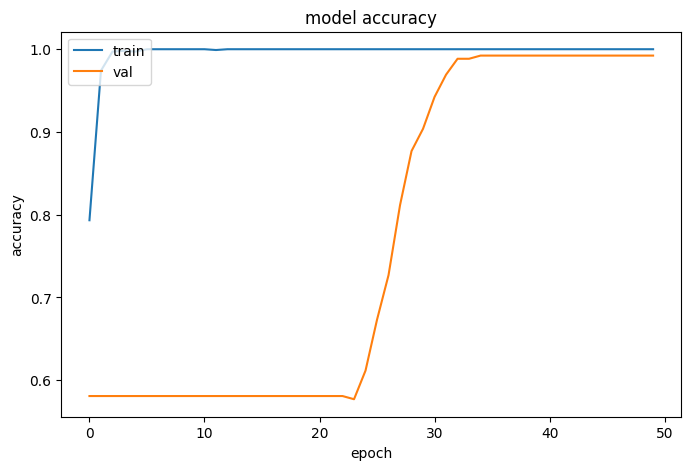



Accuracy on training set is 1.0

Accuracy on test set is 0.9923076629638672


In [17]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
print("\nAccuracy on test set is {}".format(history.history["val_accuracy"][-1]))

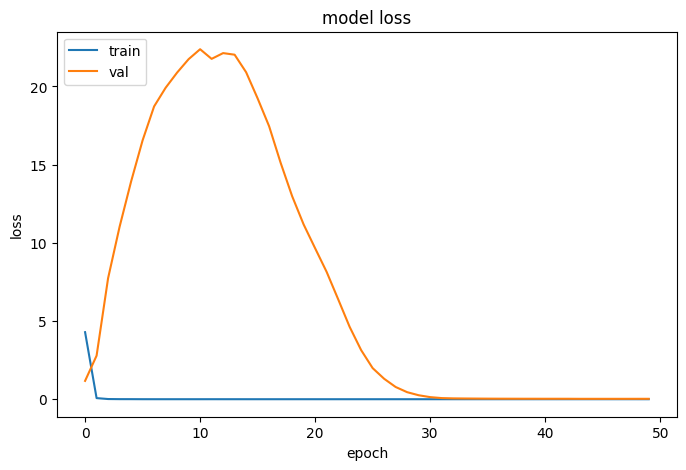



Accuracy on training set is 1.0

Accuracy on test set is 0.9923076629638672


In [18]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
print("\nAccuracy on test set is {}".format(history.history["val_accuracy"][-1]))